In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb

# ETL

In [2]:
df_raw=pd.read_csv('../data/rm-yields-data.csv')

In [3]:
df_raw.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


In [4]:
df=df_raw.loc[df_raw['RM'] == 244][['Year', 'Oats']]

In [5]:
df.head()

,Year,Oats
12324,1938,30.0
12325,1939,15.0
12326,1940,24.0
12327,1941,21.0
12328,1942,47.0


In [6]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

In [7]:
df=df.set_index('Year')
df.head()

,Oats
Year,
1938,30.0
1939,15.0
1940,24.0
1941,21.0
1942,47.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 1938 to 2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Oats    85 non-null     float64
dtypes: float64(1)
memory usage: 1020.0 bytes


<Axes: xlabel='Year'>

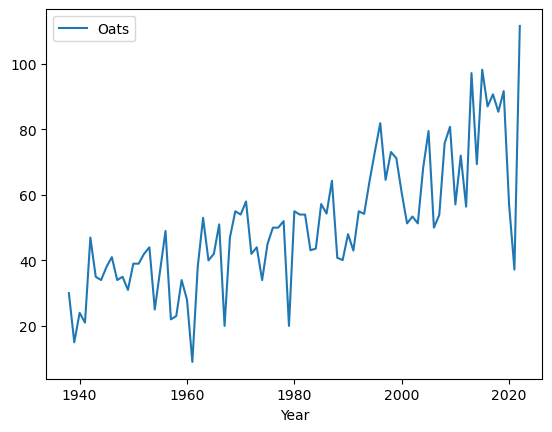

In [10]:
df.plot()

# Time Series Analysis

## AR (Autoregressive model)

AR(p) is a simple but powerful model that assumes the value of a variable at a given time point depends linearly on its past values. In other words, it assumes that the current value of a variable can be predicted based on its own previous values.

X(t) = c + φ₁X(t-1) + φ₂X(t-2) + ... + φₚX(t-p) + ε(t)

- X(t): the variable of interest at time t 
- c: constant term 
- φ₁, φ₂, ..., φₚ are the autoregressive coefficients
- X(t-1), X(t-2), ..., X(t-p): lagged values
- ε(t): random error term.

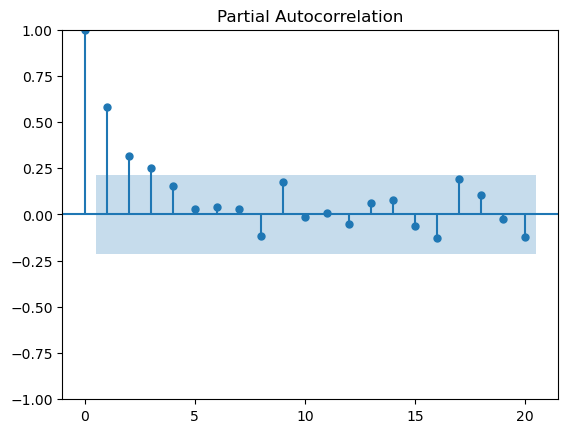

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Oats'], lags=None, method='ywm')
plt.show()

In [13]:
import statsmodels.api as sm

# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df['Oats'], lags=[1], return_df=True)

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 1: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 1: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 1: 30.05
Durbin-Watson p-value for lag 1: 0.000000


In [15]:
# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df['Oats'], lags=[2], return_df=True)

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 2: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 2: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 2: 56.80
Durbin-Watson p-value for lag 2: 0.000000


In [16]:
# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df['Oats'], lags=[3], return_df=True)

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 3: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 3: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 3: 84.36
Durbin-Watson p-value for lag 3: 0.000000


In [17]:
# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df['Oats'], lags=[4], return_df=True)

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 4: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 4: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 4: 109.70
Durbin-Watson p-value for lag 4: 0.000000


Durbin-Watson Statistics range from 0 to 4.
- 2 no autocorelation
- 4 negative autocorelation
- 0 positive autocreation

If P-value value is under 0.05, we can reject null hypothesis. In our case, it is 0.00. We can reject the null hyp, thus there is a strong autocorelation.

In [18]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(df['Oats'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]
print('Dickey-Fuller Test Statistic:', test_statistic)
print('Dickey-Fuller p-value:', p_value)


Dickey-Fuller Test Statistic: -0.13212860265306178
Dickey-Fuller p-value: 0.9461428749290007


Dickey-Fuller test results shows that we can not reject the null hypothesis. So our time series is non-stationary which means it does not have a constant variance over time.

There are multiple way to make your data stationary:
- Differencing
- Transformation (z score is 1, it means it is 1 std away from the mean)
- Seasonal adjustement

In [19]:
df['Oats_diff']=df['Oats'].diff()

c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


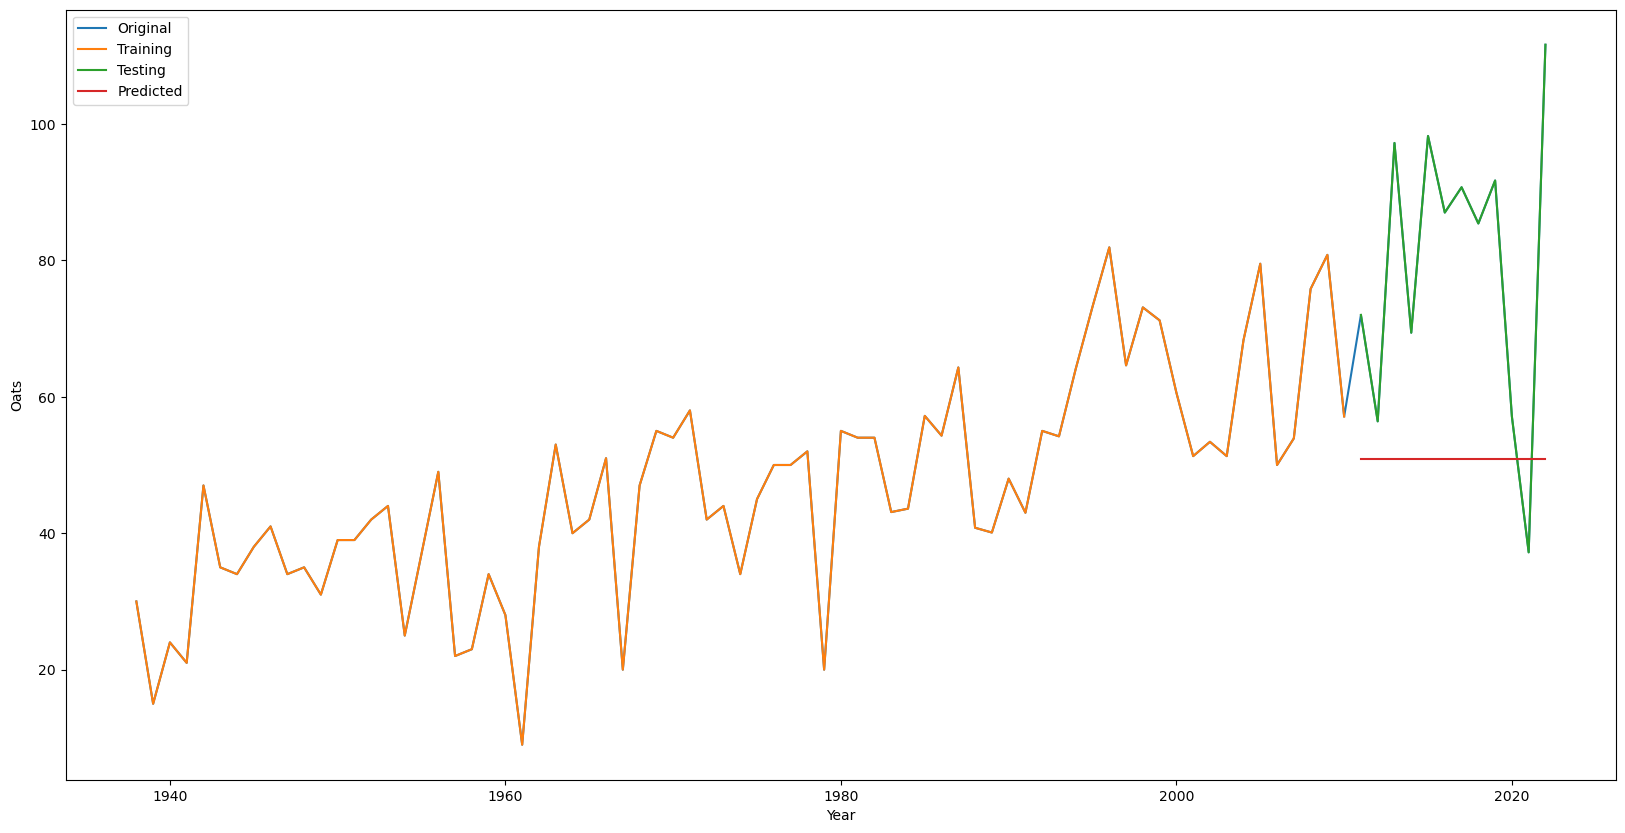

Mean Absolute Error: 30.91677321294154
Root Mean Squared Error 35.22170691380594


In [20]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train = df.loc['1938':'2010', 'Oats']
test = df.loc['2011':'2022', 'Oats']
# Fit an AR model to the training set with an order of 1
ar_model = sm.tsa.AutoReg(train, lags=3).fit()

# Make predictions on the testing set
pred_ar = ar_model.predict(start=test.index[0], end=test.index[-1])


# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Oats'], label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(pred_ar, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_ar = mean_absolute_error(test, pred_ar )
rmse_ar = mean_squared_error(test, pred_ar , squared=False)

print('Mean Absolute Error:', mae_ar)
print('Root Mean Squared Error', rmse_ar)

<Axes: >

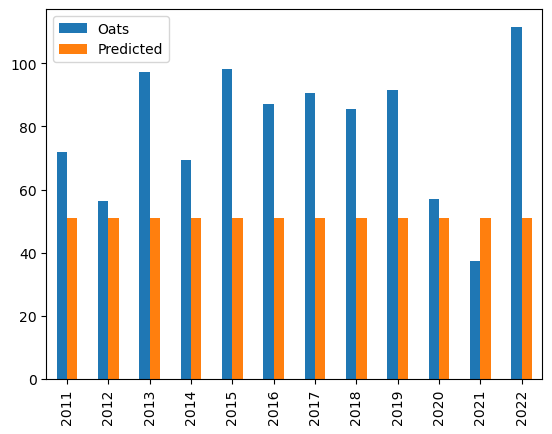

In [21]:
pd.concat([test, pred_ar], axis=1).rename(columns={0: 'Predicted'}).plot(kind='bar')

c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


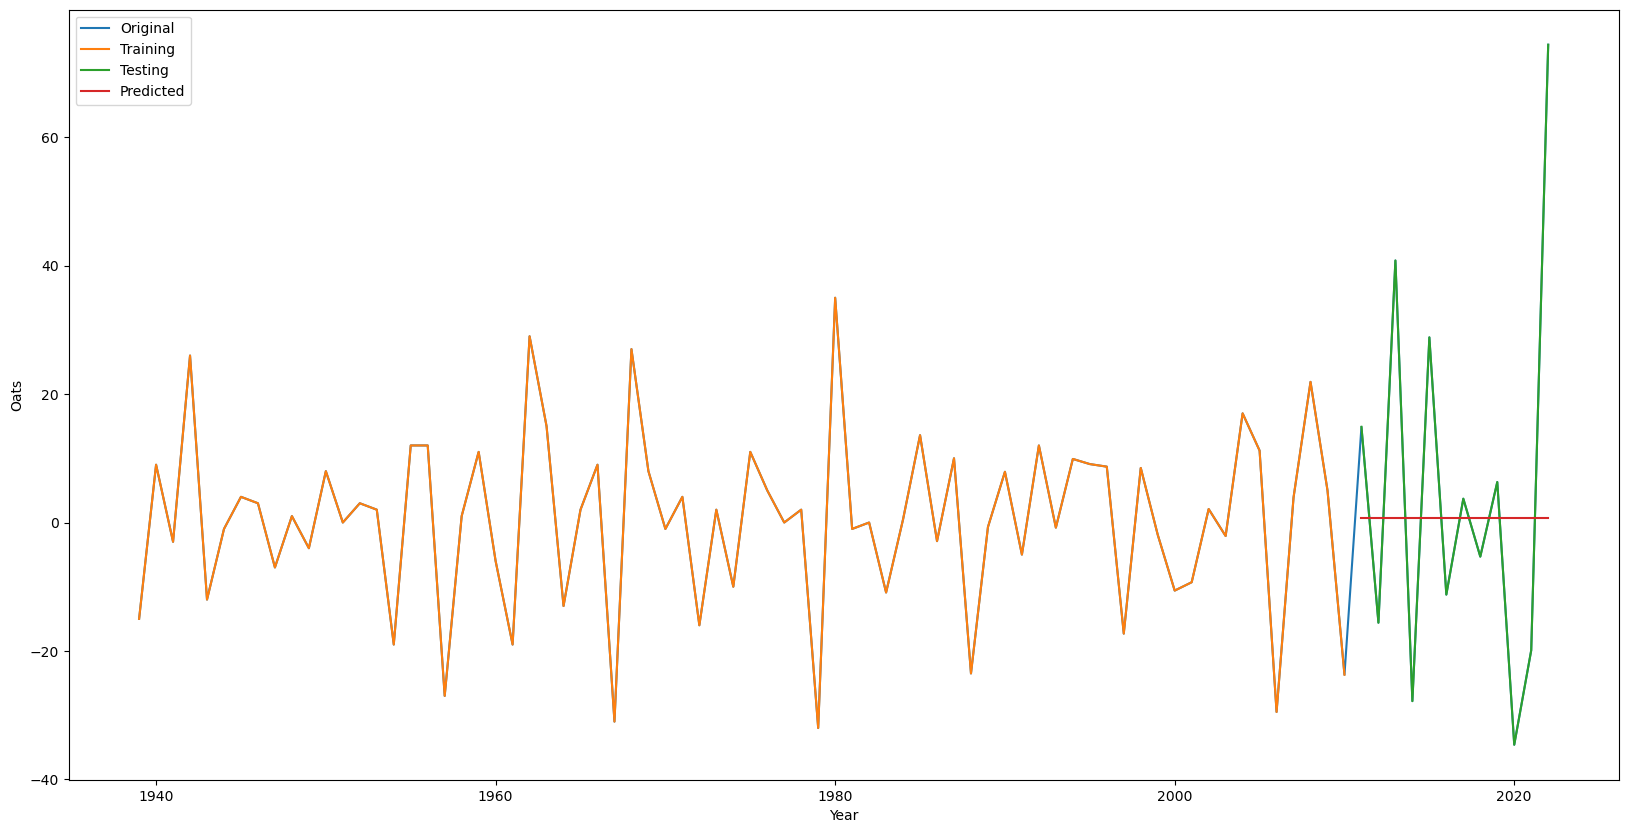

Mean Absolute Error: 23.615
Root Mean Squared Error 30.2823049074045


In [24]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_diff = df.loc['1938':'2010', 'Oats_diff'].dropna()
test_diff = df.loc['2011':'2022', 'Oats_diff']
# Fit an AR model to the training set with an order of 1
ar_model_diff = sm.tsa.AutoReg(train_diff, lags=3).fit()

# Make predictions on the testing set
pred_ar_diff = ar_model_diff.predict(start=test.index[0], end=test.index[-1])


# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Oats_diff'], label='Original')
ax.plot(train_diff, label='Training')
ax.plot(test_diff, label='Testing')
ax.plot(pred_ar_diff, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_diff_ar = mean_absolute_error(test_diff, pred_ar_diff )
rmse_diff_ar = mean_squared_error(test_diff, pred_ar_diff , squared=False)

print('Mean Absolute Error:', mae_diff_ar)
print('Root Mean Squared Error', rmse_diff_ar)

In [25]:
pred_ar_diff

2011    0.656941
2012    0.656941
2013    0.656941
2014    0.656941
2015    0.656941
2016    0.656941
2017    0.656941
2018    0.656941
2019    0.656941
2020    0.656941
2021    0.656941
2022    0.656941
dtype: float64

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA(p,d,q) is a popular and widely used model for time series forecasting and analysis. Three main comonnts:
- Autoregressive (p) - corelation current time value and historical lagged values
- Integrated (d) - differencing values to make it stationary
- Moving Average (q) - The moving average component represents the relationship between an observation in the time series and the residual errors from a moving average model applied to lagged observations. It captures random noise and shocks in data

c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thong.lam\AppDa

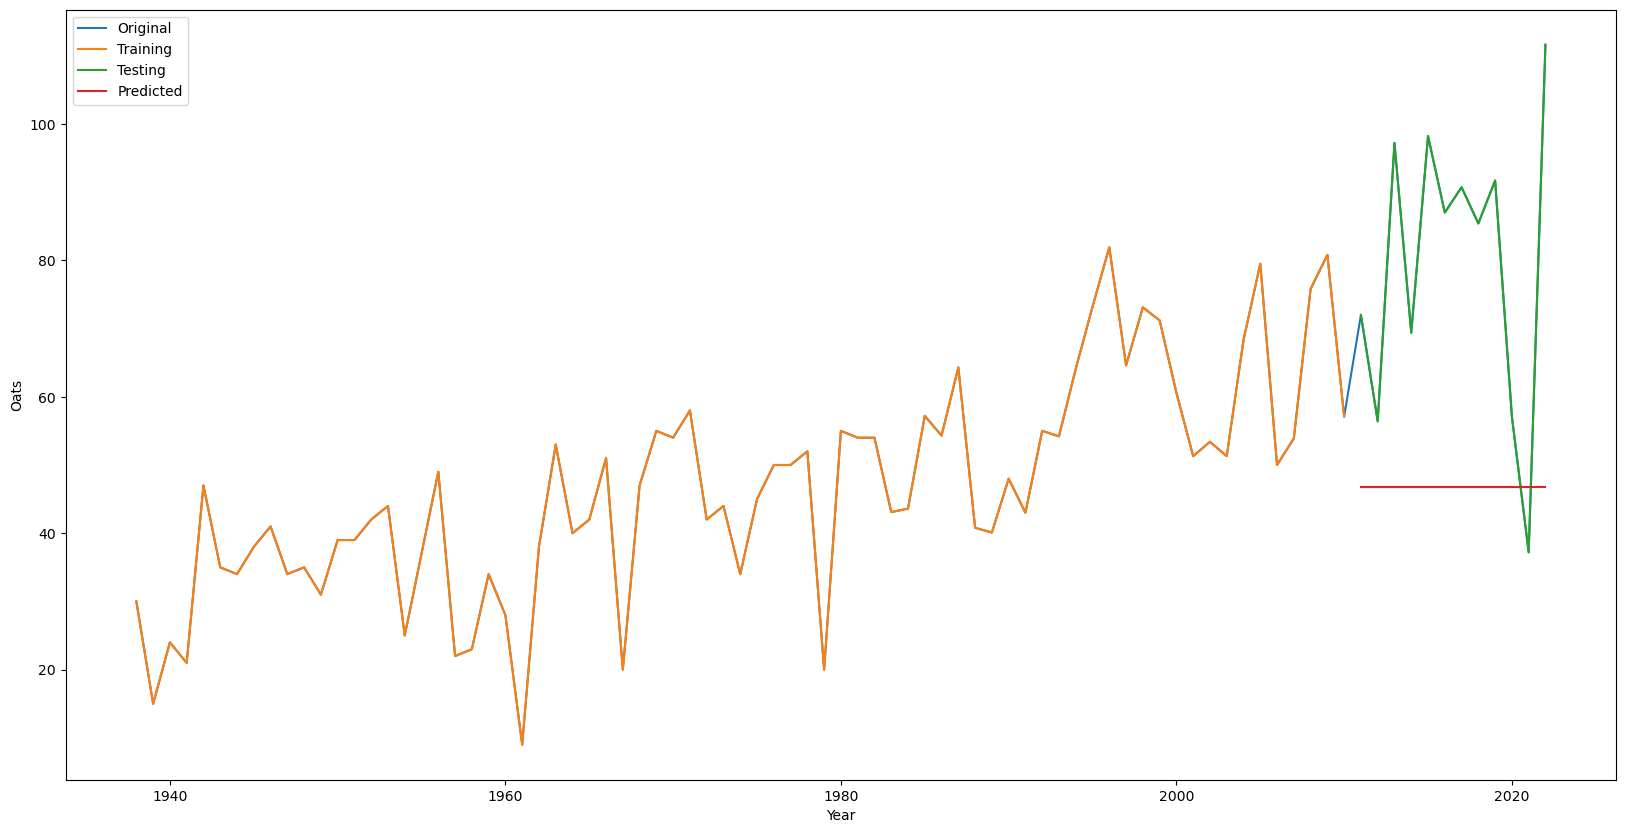

Mean Absolute Error: 34.33814300508755
Root Mean Squared Error 38.634288149304375


In [26]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fit the ARIMA model
model_arima = ARIMA(train, order=(2, 0, 2))
model_fit = model_arima.fit()

# Make predictions
pred_arima = model_fit.predict(start=test.index[0], end=test.index[-1])

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Oats'], label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(pred_arima, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_arima = mean_absolute_error(test, pred_arima )
rmse_arima = mean_squared_error(test, pred_arima , squared=False)

print('Mean Absolute Error:', mae_arima)
print('Root Mean Squared Error', rmse_arima)

c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thong.lam\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thong.lam\AppDa

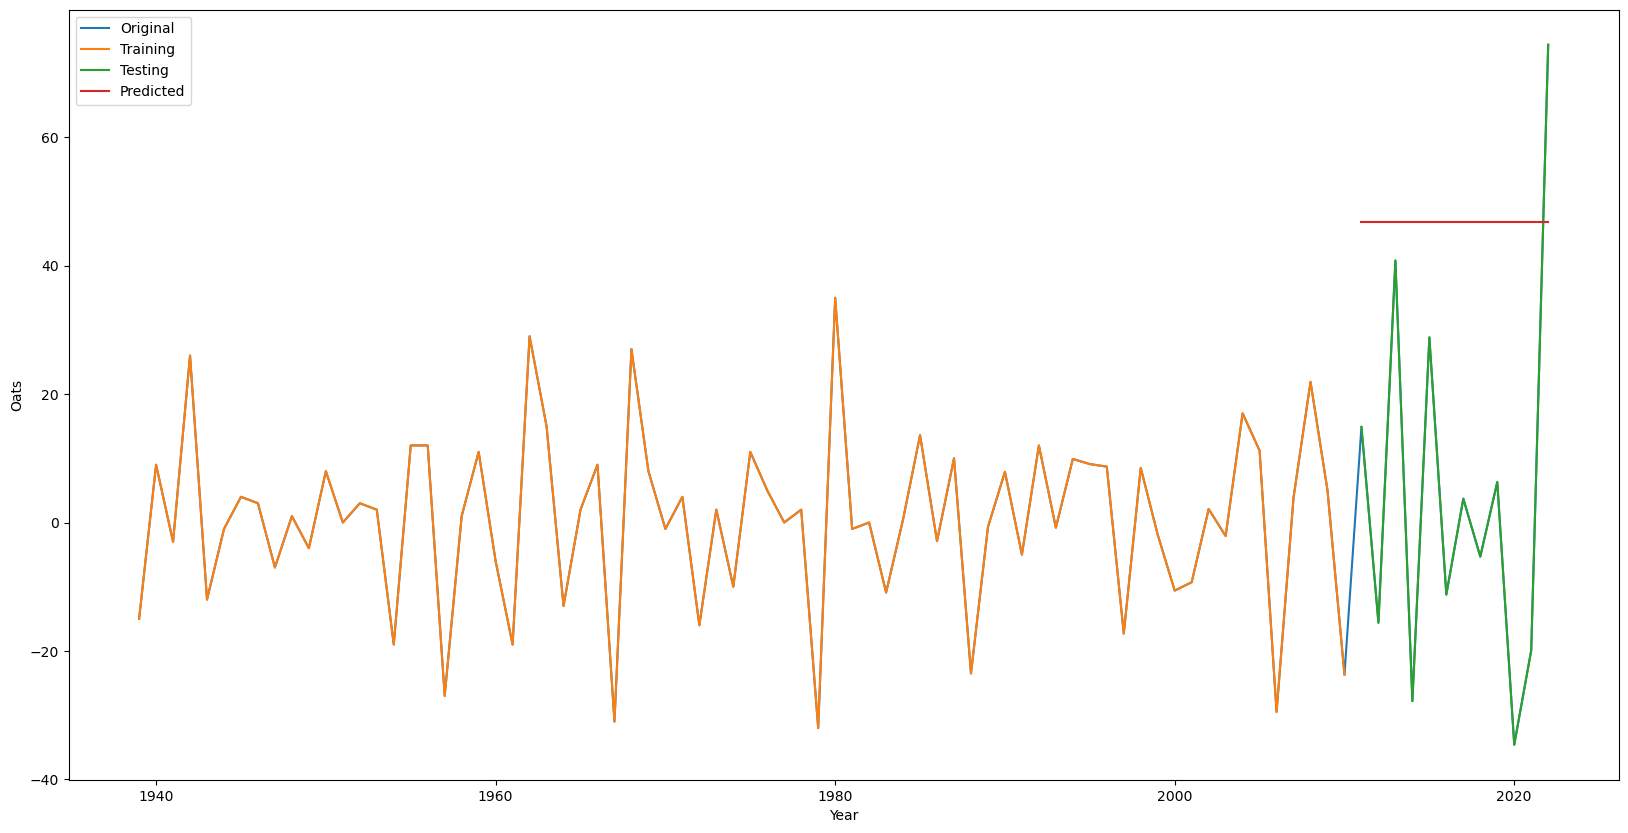

Mean Absolute Error: 34.33814300508755
Root Mean Squared Error 38.634288149304375


In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fit the ARIMA model
model_arima_diff = ARIMA(train_diff, order=(3, 0, 1))
model_fit_diff = model_arima.fit()

# Make predictions
pred_arima_diff = model_fit.predict(start=test_diff.index[0], end=test_diff.index[-1])

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Oats_diff'], label='Original')
ax.plot(train_diff, label='Training')
ax.plot(test_diff, label='Testing')
ax.plot(pred_arima, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_arima_diff = mean_absolute_error(test, pred_arima_diff )
rmse_arima_diff = mean_squared_error(test, pred_arima_diff , squared=False)

print('Mean Absolute Error:', mae_arima_diff)
print('Root Mean Squared Error', rmse_arima_diff)

## XGBoost Time Series

XGBoost (eXtreme Gradient Boosting) is a machine learning algorithm known for its effectiveness in handling structured data and achieving high prediction accuracy. While XGBoost was initially developed for tabular data and classification problems, it has also been adapted for time series analysis.

Time series analysis involves analyzing and forecasting data points collected over time, where the order of observations is important. Traditional time series models like ARIMA (Autoregressive Integrated Moving Average) and SARIMA (Seasonal Autoregressive Integrated Moving Average) have been widely used for this purpose. However, XGBoost offers an alternative approach by applying gradient boosting to time series data.

XGBoost can be applied to time series analysis by transforming the problem into a supervised learning task. The basic idea is to use lagged observations of the target variable and other relevant features as input to predict the target variable at a future time step. This transformation enables XGBoost to leverage its ability to capture complex relationships and make accurate predictions.

Here are the general steps involved in applying XGBoost to time series analysis:

1. Data Preparation: Arrange the time series data in a tabular format with columns representing lagged observations and features. The target variable should be shifted to represent future values.

2. Feature Engineering: Create relevant lagged features, such as lagged values of the target variable and other variables that may have predictive power. Additionally, you can incorporate time-based features like day of the week or month.

3. Train-Test Split: Divide the dataset into training and testing sets, ensuring that the order of observations is preserved. Typically, the more recent data is kept for testing to evaluate the model's performance on unseen data.

4. XGBoost Modeling: Build an XGBoost model using the training data. Specify the appropriate objective function, hyperparameters, and performance metrics based on your specific time series problem.

5. Model Training: Train the XGBoost model on the training set, optimizing the objective function and minimizing the chosen loss function.

6. Model Evaluation: Evaluate the trained model on the test set using appropriate evaluation metrics for time series forecasting, such as mean absolute error (MAE) or root mean squared error (RMSE).

7. Model Fine-tuning: Experiment with different hyperparameter values, feature selection techniques, or model architectures to improve performance. Techniques like cross-validation can be applied for hyperparameter tuning.

8. Forecasting: Once the model is trained and validated, you can use it to make predictions on unseen data or forecast future values of the time series.

XGBoost's strengths in handling complex relationships and capturing non-linear patterns make it a popular choice for time series analysis, particularly when other traditional models may not perform as well. However, it's important to note that XGBoost may not always be the best choice for all time series problems, and it's advisable to compare its performance with other appropriate models before finalizing the approach.

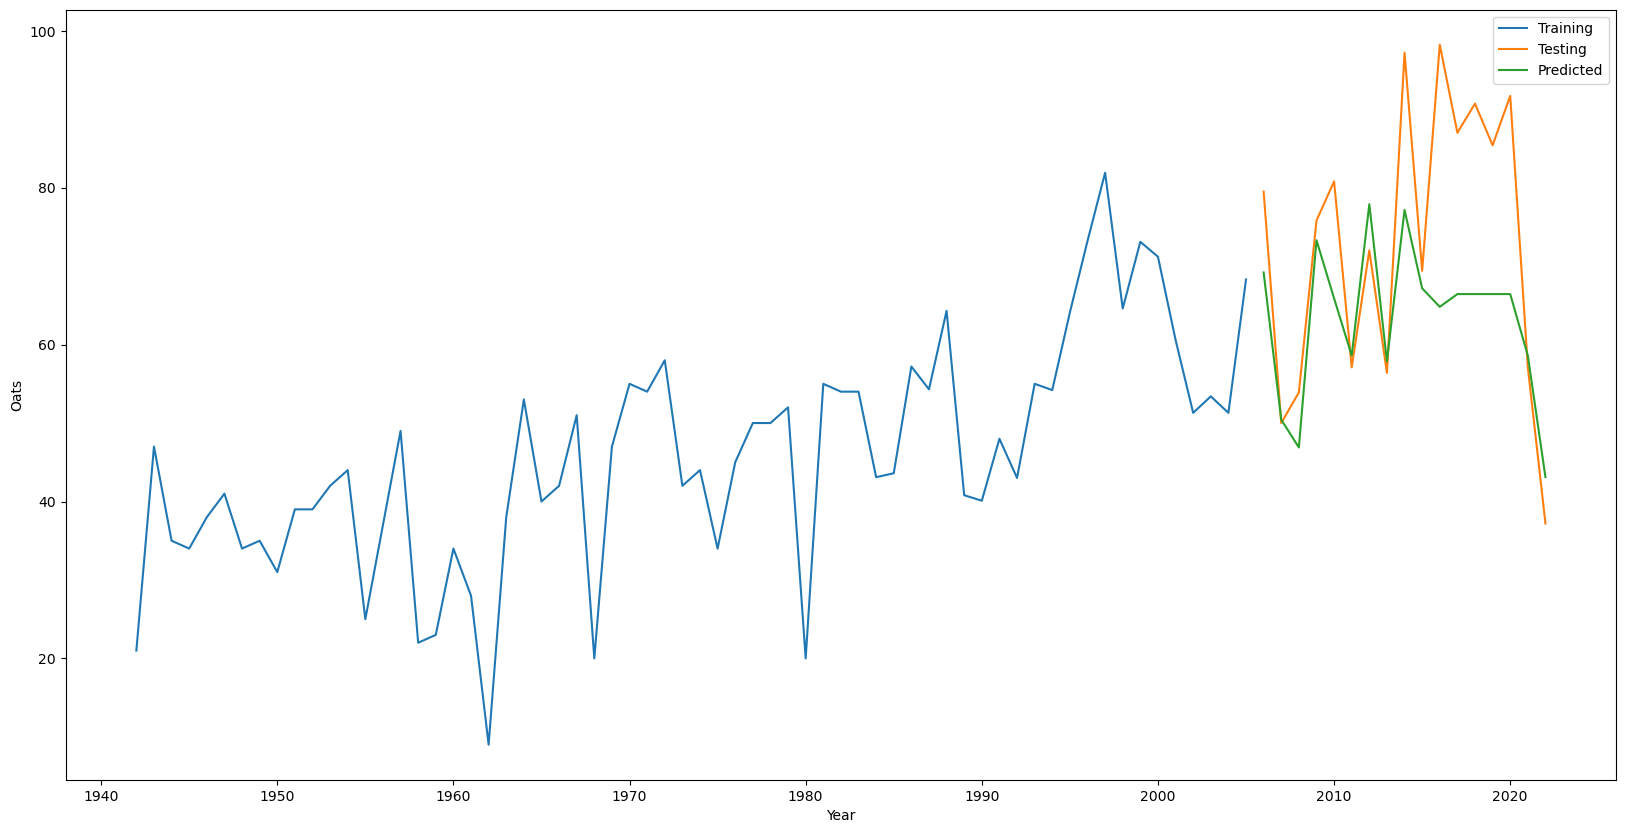

MAE: 21.813233579747816
RMSE: 26.433382368093167


In [29]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Step 1: Prepare the data
# Create lagged features of the target variable
df['lag1'] = df['Oats'].shift(1)
df['lag2'] = df['Oats'].shift(2)
df.dropna(inplace=True)

# Step 2: Split the data
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Separate features and target variables
train_features = train_data[['lag1', 'lag2']]
train_target = train_data['Oats']
test_features = test_data[['lag1', 'lag2']]
test_target = test_data['Oats']

# Step 3: Define the XGBoost model
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3) # grid search

# Step 4: Train the model
model_xgb.fit(train_features, train_target)

# Step 5: Make predictions
pred_xgb = model_xgb.predict(test_features)
pred_xgb = pd.Series(pred_xgb, index=test_features.index)

# Step 6: Evaluate the model
mae_xgb = mean_absolute_error(test_target, pred_xgb)
rmse_xgb = sqrt(mean_squared_error(test_target, pred_xgb))

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(train_features['lag1'], label='Training')
ax.plot(test_features['lag1'], label='Testing')
ax.plot(pred_xgb, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)


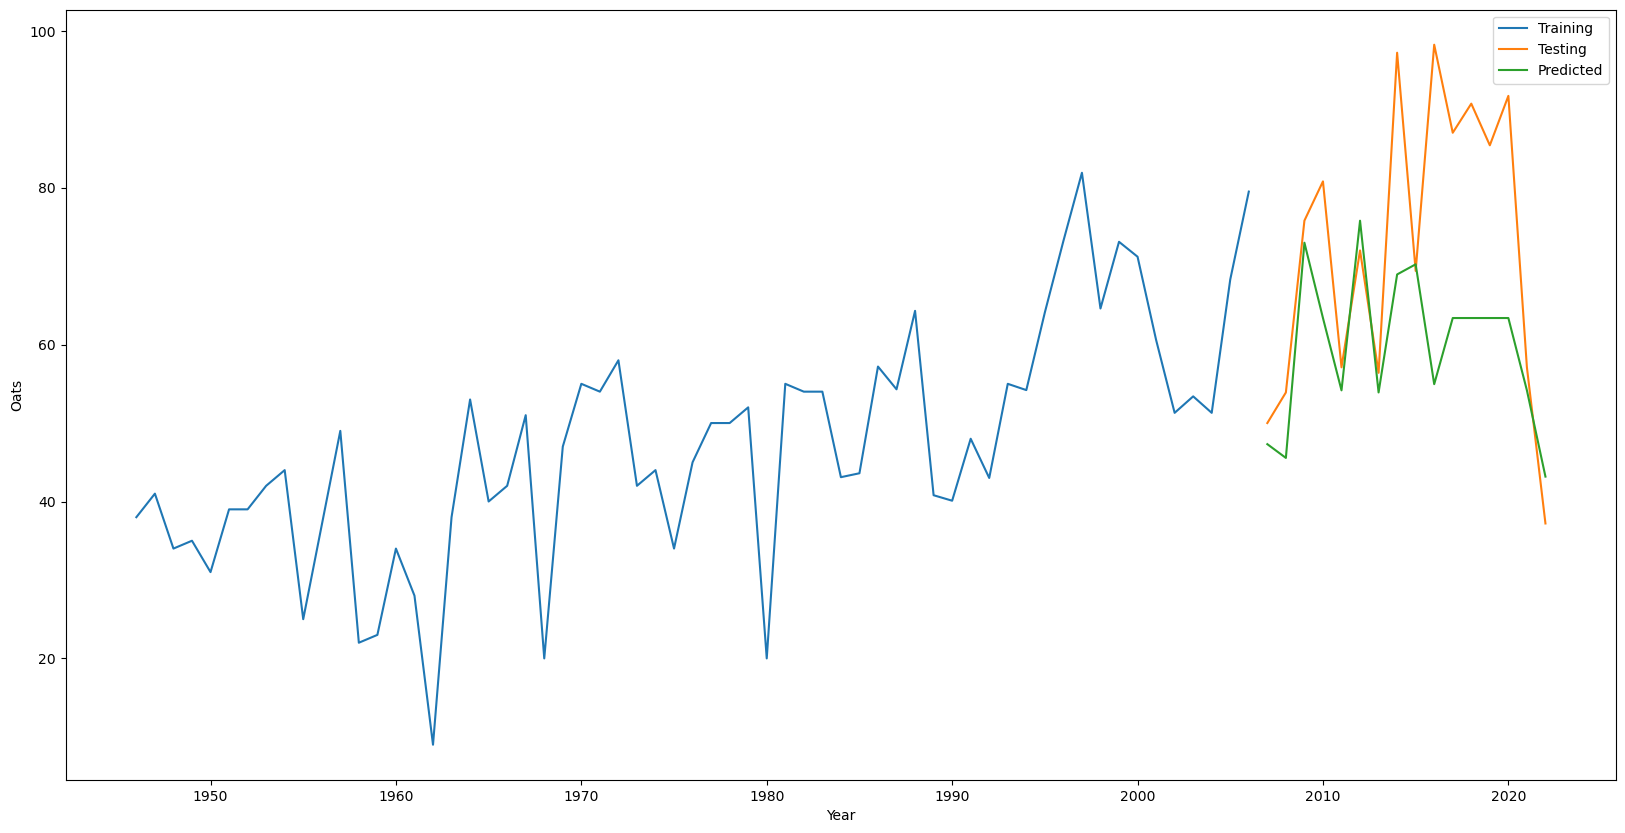

MAE: 22.57952463150024
RMSE: 27.92899642947983


In [31]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Step 1: Prepare the data
# Create lagged features of the target variable
df['lag1'] = df['Oats'].shift(1)
df['lag2'] = df['Oats'].shift(2)
df.dropna(inplace=True)

# Step 2: Split the data
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Separate features and target variables
train_features = train_data[['lag1', 'lag2']]
train_target = train_data['Oats']
test_features = test_data[['lag1', 'lag2']]
test_target = test_data['Oats']

# Step 3: Define the XGBoost model
model_xgb = xgb.XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)

# Step 4: Train the model
model_xgb.fit(train_features, train_target)

# Step 5: Make predictions
pred_xgb = model_xgb.predict(test_features)
pred_xgb = pd.Series(pred_xgb, index=test_features.index)

# Step 6: Evaluate the model
mae_xgb = mean_absolute_error(test_target, pred_xgb)
rmse_xgb = sqrt(mean_squared_error(test_target, pred_xgb))

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(train_features['lag1'], label='Training')
ax.plot(test_features['lag1'], label='Testing')
ax.plot(pred_xgb, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Oats')
ax.legend()
plt.show()
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)